# Learn and Predict CSAT using ML algorithms

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'png' #set 'png' here when working on notebook
%matplotlib inline
from scipy import stats

# hide all warnings
import warnings
warnings.filterwarnings('ignore');

/Users/kselvadurai/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/kselvadurai/anaconda/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
train_df = pd.read_csv("input/2018_csat.csv")
test_df = pd.read_csv("input/2019_csat.csv")

In [3]:
y_train_df = train_df.AverageCSAT
train_df.drop('CaseNumber', axis=1, inplace=True)
train_df.drop('DateOpened', axis=1, inplace=True)
train_df.drop('DateInitialResponse', axis=1, inplace=True)
train_df.drop('DateEscalated', axis=1, inplace=True)
y_test_df = test_df.AverageCSAT
test_df.drop('AverageCSAT', axis=1, inplace=True)
test_df.drop('CaseNumber', axis=1, inplace=True)
test_df.drop('DateOpened', axis=1, inplace=True)
test_df.drop('DateInitialResponse', axis=1, inplace=True)
test_df.drop('DateEscalated', axis=1, inplace=True)

In [4]:
y_train_df

0       4.50
1       5.00
2       4.80
3       3.00
4       4.40
5       5.00
6       3.40
7       5.00
8       5.00
9       4.60
10      5.00
11      4.75
12      5.00
13      5.00
14      4.80
15      5.00
16      4.80
17      4.80
18      5.00
19      4.80
20      2.20
21      4.60
22      5.00
23      3.00
24      5.00
25      5.00
26      4.00
27      5.00
28      4.80
29      5.00
        ... 
1673    4.00
1674    3.80
1675    5.00
1676    5.00
1677    4.20
1678    5.00
1679    4.00
1680    5.00
1681    5.00
1682    5.00
1683    5.00
1684    5.00
1685    5.00
1686    3.25
1687    5.00
1688    5.00
1689    4.80
1690    5.00
1691    3.40
1692    4.60
1693    5.00
1694    3.00
1695    3.60
1696    5.00
1697    5.00
1698    5.00
1699    4.25
1700    4.40
1701    4.60
1702    4.80
Name: AverageCSAT, Length: 1703, dtype: float64

In [5]:
# perform one-hot encoding
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

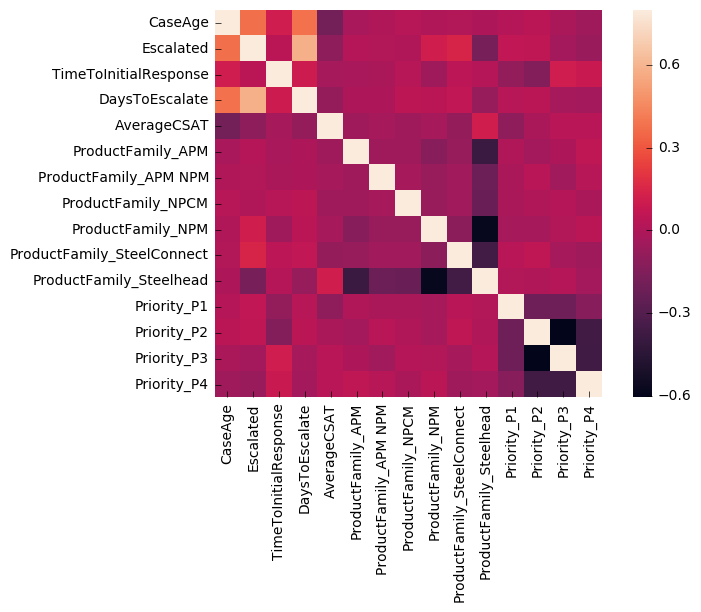

In [6]:
import seaborn as sns
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(corrmat, vmax=.8, square=True);

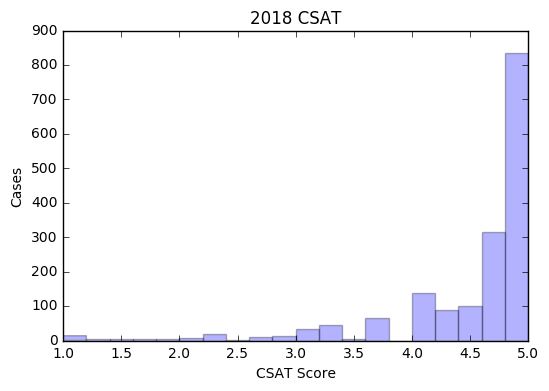

In [7]:
# plot CSAT distribution
fig, ax = plt.subplots(figsize=(6, 4))

ax.hist(y_train_df.data,bins=20,alpha=0.3)
ax.set_title('2018 CSAT')
ax.xaxis.set_label_text('CSAT Score')
ax.yaxis.set_label_text('Cases')

plt.show();

In [8]:
train_df.describe()

,CaseAge,Escalated,TimeToInitialResponse,DaysToEscalate,AverageCSAT,ProductFamily_APM,ProductFamily_APM NPM,ProductFamily_NPCM,ProductFamily_NPM,ProductFamily_SteelConnect,ProductFamily_Steelhead,Priority_P1,Priority_P2,Priority_P3,Priority_P4
count,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000,1703.000000
mean,16.908984,0.115678,1.586612,0.582501,4.517998,0.078097,0.026424,0.027011,0.158544,0.065766,0.644157,0.066353,0.375220,0.379918,0.178509
std,33.898054,0.319933,3.322729,2.763511,0.756627,0.268404,0.160440,0.162163,0.365357,0.247946,0.478908,0.248972,0.484322,0.485509,0.383053
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,4.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,0.000000,0.000000,0.000000,4.800000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,17.000000,0.000000,2.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,481.000000,1.000000,23.000000,31.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# remove AverageCSAT from training set after heatmap
train_df.drop('AverageCSAT', axis=1, inplace=True)

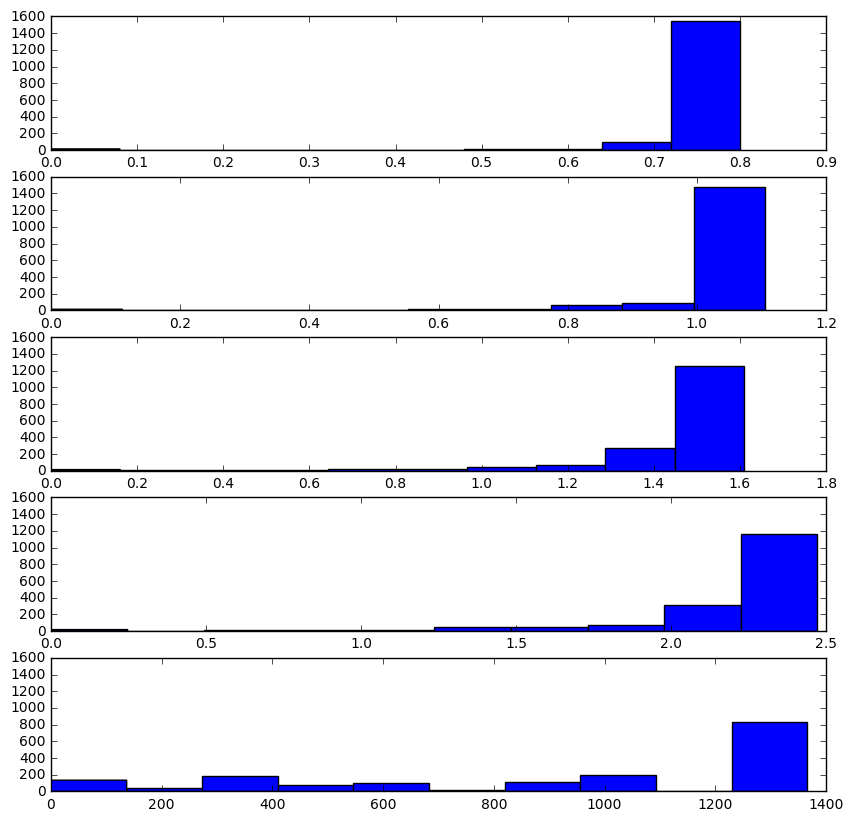

In [10]:
# boxcox transform label to see how normal its distribution and plot for comparison
y_train_arr,lmbd = stats.boxcox(y_train_df)
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharey=True, figsize=(10, 10))
ax1.hist(stats.boxcox(y_train_df,-1.0))
ax2.hist(stats.boxcox(y_train_df,-0.5))
ax3.hist(stats.boxcox(y_train_df,0.0))
ax4.hist(stats.boxcox(y_train_df,0.5))
ax5.hist(y_train_arr);

In [11]:
# label takes the Box Cox transform AverageCSAT
y_train_df = pd.DataFrame(y_train_arr)

## Build an emsemble model to fit/predict

In [12]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

/Users/kselvadurai/anaconda/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [13]:
#Validation function
n_folds = 5

In [14]:
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train_df.values)
    rmse= np.sqrt(-cross_val_score(model, train_df.values, y_train_df.values, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [15]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)


In [16]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self

    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1) 

In [17]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 459.1301 (27.2738)



In [18]:
# fit the model with train data
averaged_models.fit(train_df.values, y_train_df)

AveragingModels(models=(Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('elasticnet', ElasticNet(alpha=0.0005, copy_X=True, fit_intercept=True, l1_ratio=0.9,
      max_iter=1000, normalize=False, positive=False...ve=False, precompute=False, random_state=1,
   selection='cyclic', tol=0.0001, warm_start=False))])))

In [19]:
from scipy.special import inv_boxcox

# predict for test data
test_pred = averaged_models.predict(test_df)
# inverse boxcox transform
test_pred = inv_boxcox(test_pred, lmbd)

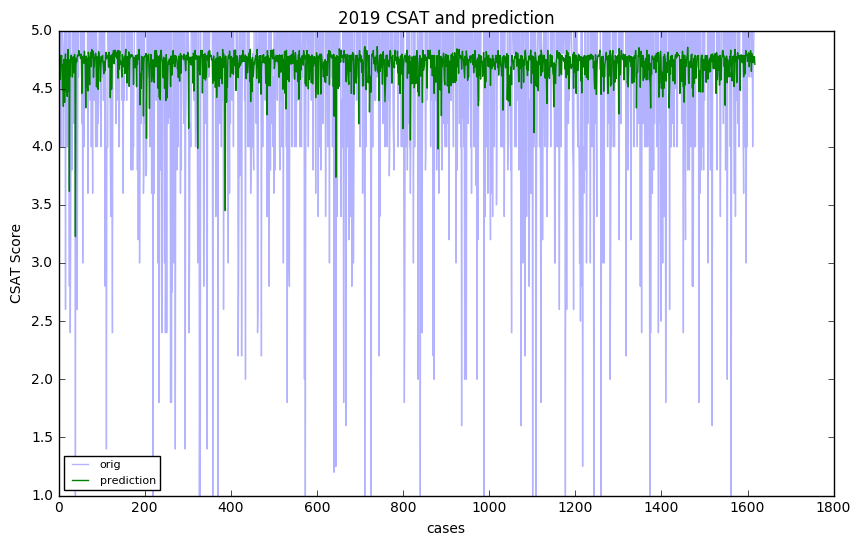

In [20]:
# plot the difference between actual and prediction score
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(y_test_df.data,alpha=0.3)
ax.plot(test_pred.data)

ax.set_title('2019 CSAT and prediction')
ax.legend(['orig','prediction'],loc=3, prop={'size': 8})
ax.xaxis.set_label_text('cases')
ax.yaxis.set_label_text('CSAT Score')

plt.show();

In [21]:
# verification if there are significant outliers
#len([(i,csat,test_pred[i]) for i,csat in enumerate(y_test_df) if (abs(y_test_df[i]-test_pred[i])>2.0)])
rms = np.sqrt(np.mean(np.square(y_test_df-test_pred)))
print(rms)

0.8171703987351848


## Build an XGBoost model for comparison

In [38]:
import xgboost as xgb

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [39]:
model_xgb.fit(train_df,y_train_df)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.4603, gamma=0.0468, learning_rate=0.05,
       max_delta_step=0, max_depth=3, min_child_weight=1.7817,
       missing=None, n_estimators=2200, n_jobs=1, nthread=-1,
       objective='reg:linear', random_state=7, reg_alpha=0.464,
       reg_lambda=0.8571, scale_pos_weight=1, seed=None, silent=1,
       subsample=0.5213)

In [40]:
xgb_pred = model_xgb.predict(test_df)
# inverse boxcox transform
xgb_pred = inv_boxcox(xgb_pred, lmbd)

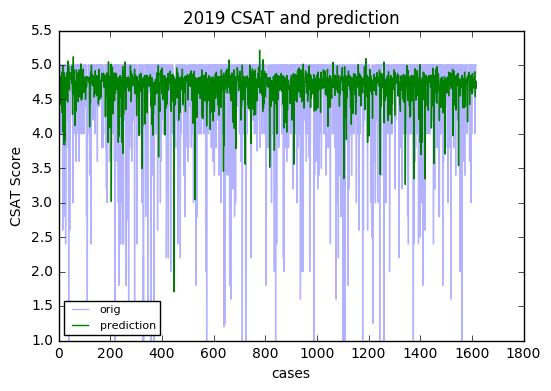

In [25]:
# plot the difference between actual and XGB prediction score
fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(y_test_df.data,alpha=0.3)
ax.plot(xgb_pred.data)

ax.set_title('2019 CSAT and prediction')
ax.legend(['orig','prediction'],loc=3, prop={'size': 8})
ax.xaxis.set_label_text('cases')
ax.yaxis.set_label_text('CSAT Score')

plt.show();

In [41]:
#len([(i,csat,xgb_pred[i]) for i,csat in enumerate(y_test_df) if (abs(y_test_df[i]-xgb_pred[i])>2.0)])
rms = np.sqrt(np.mean(np.square(y_test_df-xgb_pred)))
print(rms)

0.8264999492193894


In [27]:
# determine feature importance from trained model
feature_names = train_df.columns
coef = pd.Series(model_xgb.feature_importances_,feature_names).sort_values()

In [28]:
coef

ProductFamily_APM NPM         0.026495
ProductFamily_NPCM            0.033102
ProductFamily_NPM             0.035535
Priority_P1                   0.039430
ProductFamily_APM             0.041029
ProductFamily_SteelConnect    0.041586
ProductFamily_Steelhead       0.041655
Priority_P4                   0.045758
Priority_P2                   0.046732
Escalated                     0.047427
Priority_P3                   0.050000
DaysToEscalate                0.104937
TimeToInitialResponse         0.189569
CaseAge                       0.256745
dtype: float32

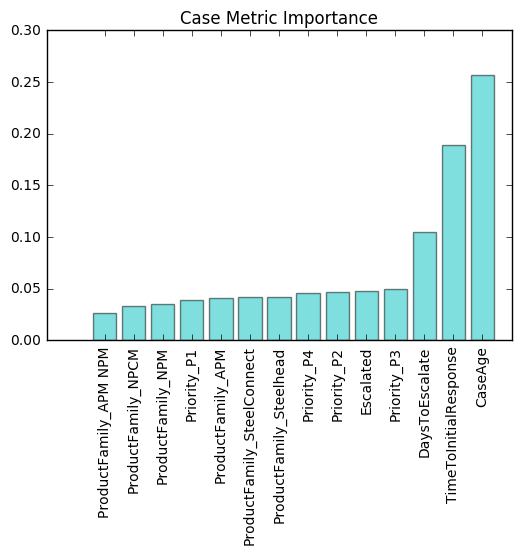

In [29]:
# plot sorted feature importance
y_pos = np.arange(len(coef.index.array))
plt.figure(figsize=(6,4))
plt.bar(y_pos,coef.values,align='center', color='c', alpha=0.5)
plt.xticks(y_pos, coef.index.array)
plt.xticks(rotation='vertical')
plt.title("Case Metric Importance")
plt.show();

In [52]:
from sklearn.feature_selection import SelectFromModel

thresholds = np.sort(model_xgb.feature_importances_)
for thresh in thresholds:
    # select features using threshold
    selection = SelectFromModel(model_xgb, threshold=thresh, prefit=True)
    select_X_train = selection.transform(train_df)
    print("{},{}".format(train_df.shape,select_X_train.shape))
    # train model
    selection_model = model_xgb
    selection_model.fit(select_X_train, y_train_df)
    # eval model
    select_X_test = selection.transform(test_df)
    y_pred = selection_model.predict(select_X_test)
    accuracy = np.sqrt(np.mean(np.square(y_test_df-y_pred)))
    print("Thresh=%.3f, n=%d, rms: %.2f%%" % (thresh, select_X_train.shape[1], accuracy))

ValueError: X has a different shape than during fitting.